# Voice Transformers

Let's learn some voice transformations!

In this tutorial, we will learn voice transformations, i.e., signal transformations, using:
- amplitude modulation, and
- granular synthesis

In [34]:
import numpy as np
import IPython

from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

%matplotlib inline
plt.style.use(['science','ieee'])

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["cm"],
    "mathtext.fontset": "cm"})

Let's first import and play a sample audio sequence.

In [35]:
Fs, s = wavfile.read('speech.wav')
s = s / 32767.0
print('sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(s, rate=Fs)

sampling rate: 16000Hz


In [36]:
def plot_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)  # positive frequencies only
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.plot(N, X)
    plt.xlabel(r'$\gamma$')
    plt.ylabel(r'$\hat{x}(\gamma)$')
    return N, X

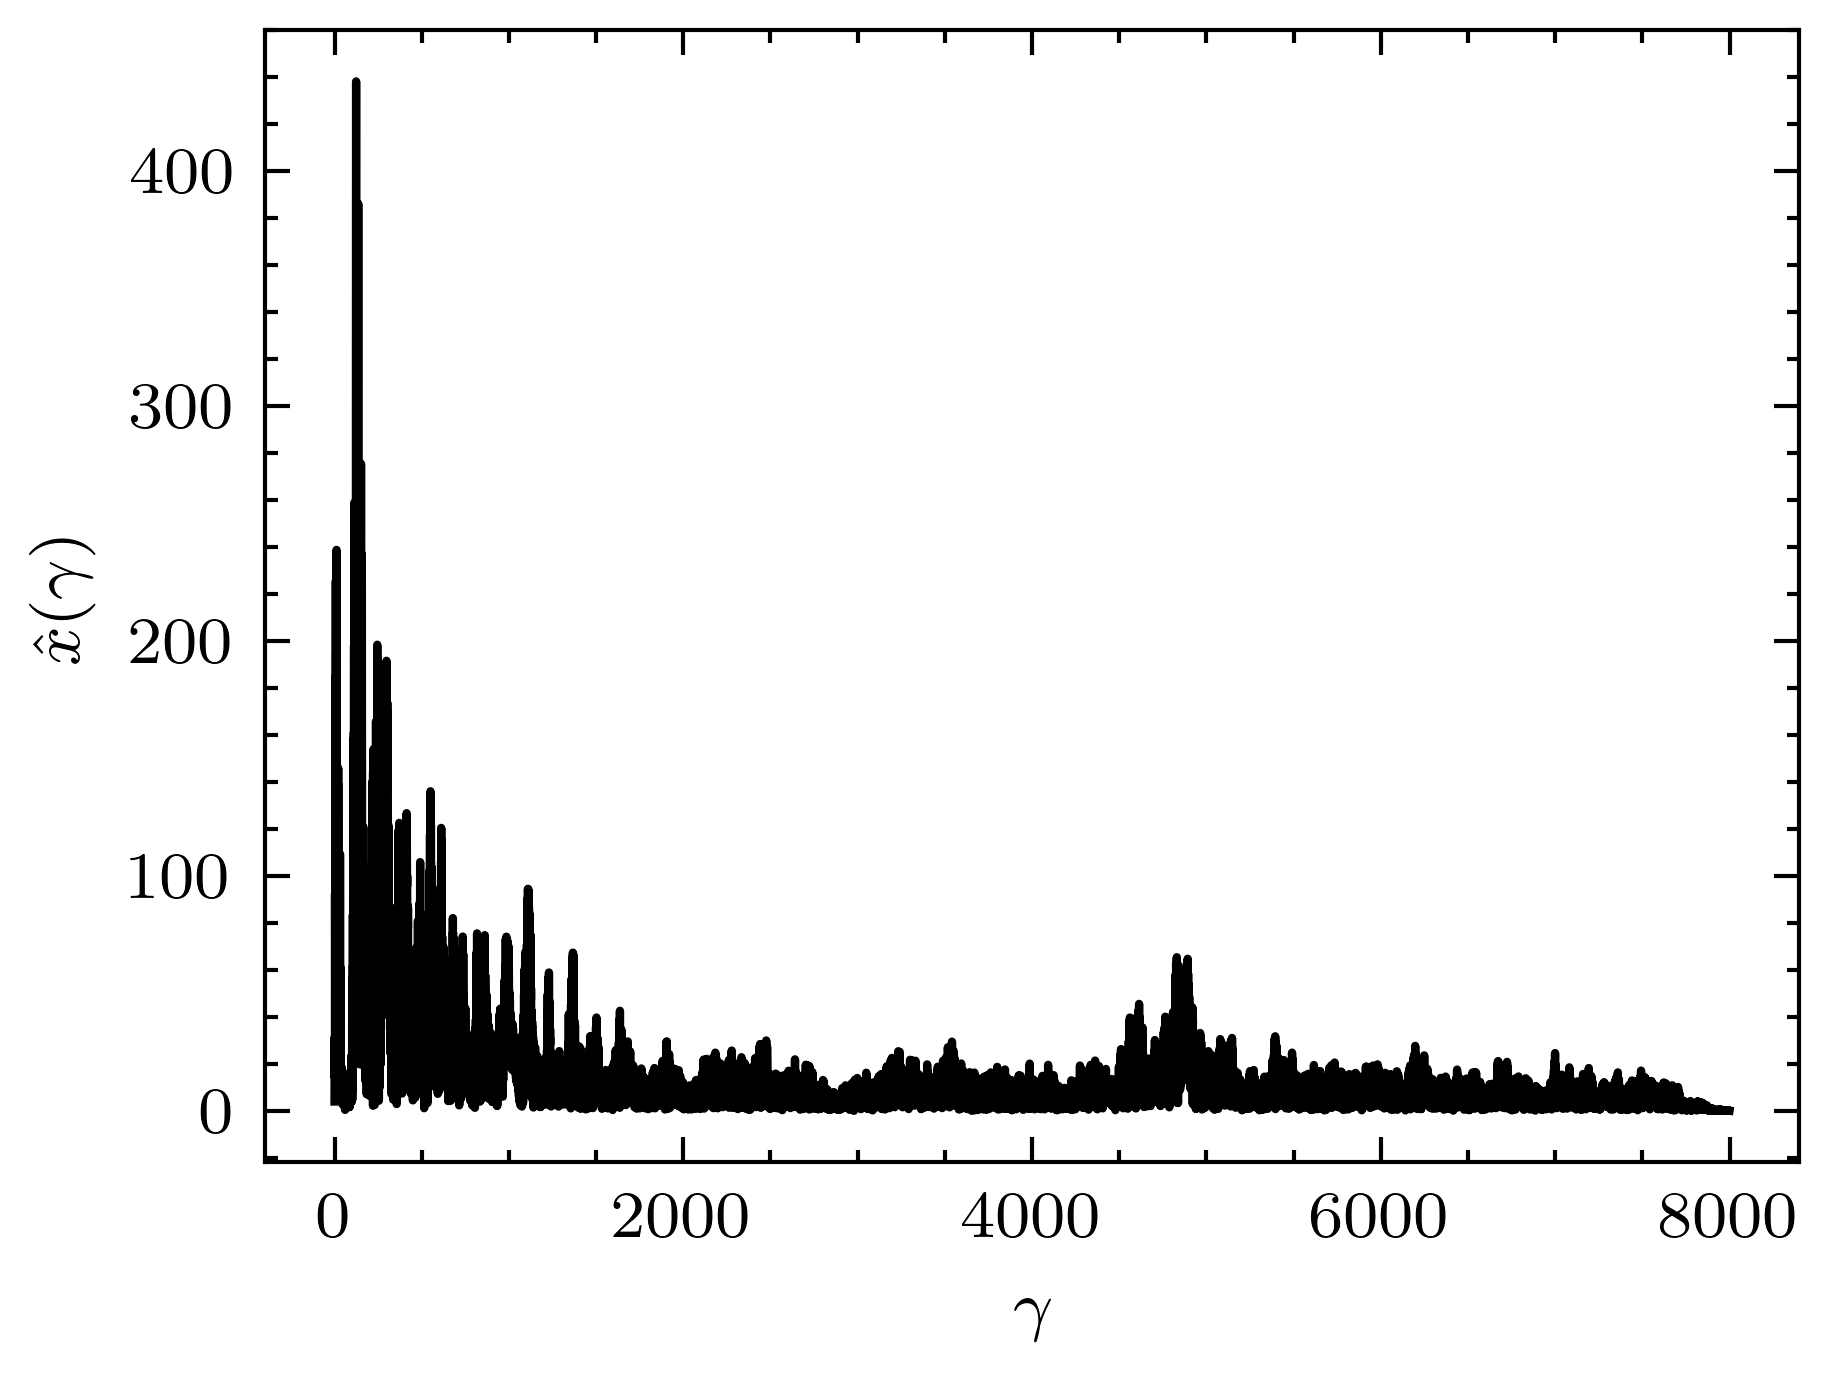

In [37]:
plot_spec(s, Fs, Fs/2);

Notice that most of the energy in the speech is concentrated in the lower frequency regions. A cheap (literally) trick is to shift the frequencies up. We must be careful and expect some aliasing artefacts that comes from such an operation, but for now, let's treat that as a part of the transformation.

Model the speech as a continuous-time signal $x(t)$, and consider the carrier signal $\cos(2\pi f_0 t)$. The output of amplitude modulation using the cosine carrier $x(t)\cos(2\pi f_0 t)$ will have the Fourier transform:
$$
    \frac{1}{2}\left[\hat{x}(\gamma+f_0) + \hat{x}(\gamma-f_0)\right],
$$
achieving shifting up of the spectrum.

<font color='red'> *Task 1:* </font> *Redo the analysis with speech modelled as a discrete signal obtained by sampling the continous signal $x(t)$ with sampling frequency $F_s$.*

In [38]:
def cosine_modulation(x, mod_freq, Fs):
    w = (float(mod_freq) / Fs) * 2 * np.pi
    return 2 * np.multiply(x, np.cos(w * np.arange(0,len(x))))

IPython.display.Audio(cosine_modulation(s, 500, Fs), rate=Fs)

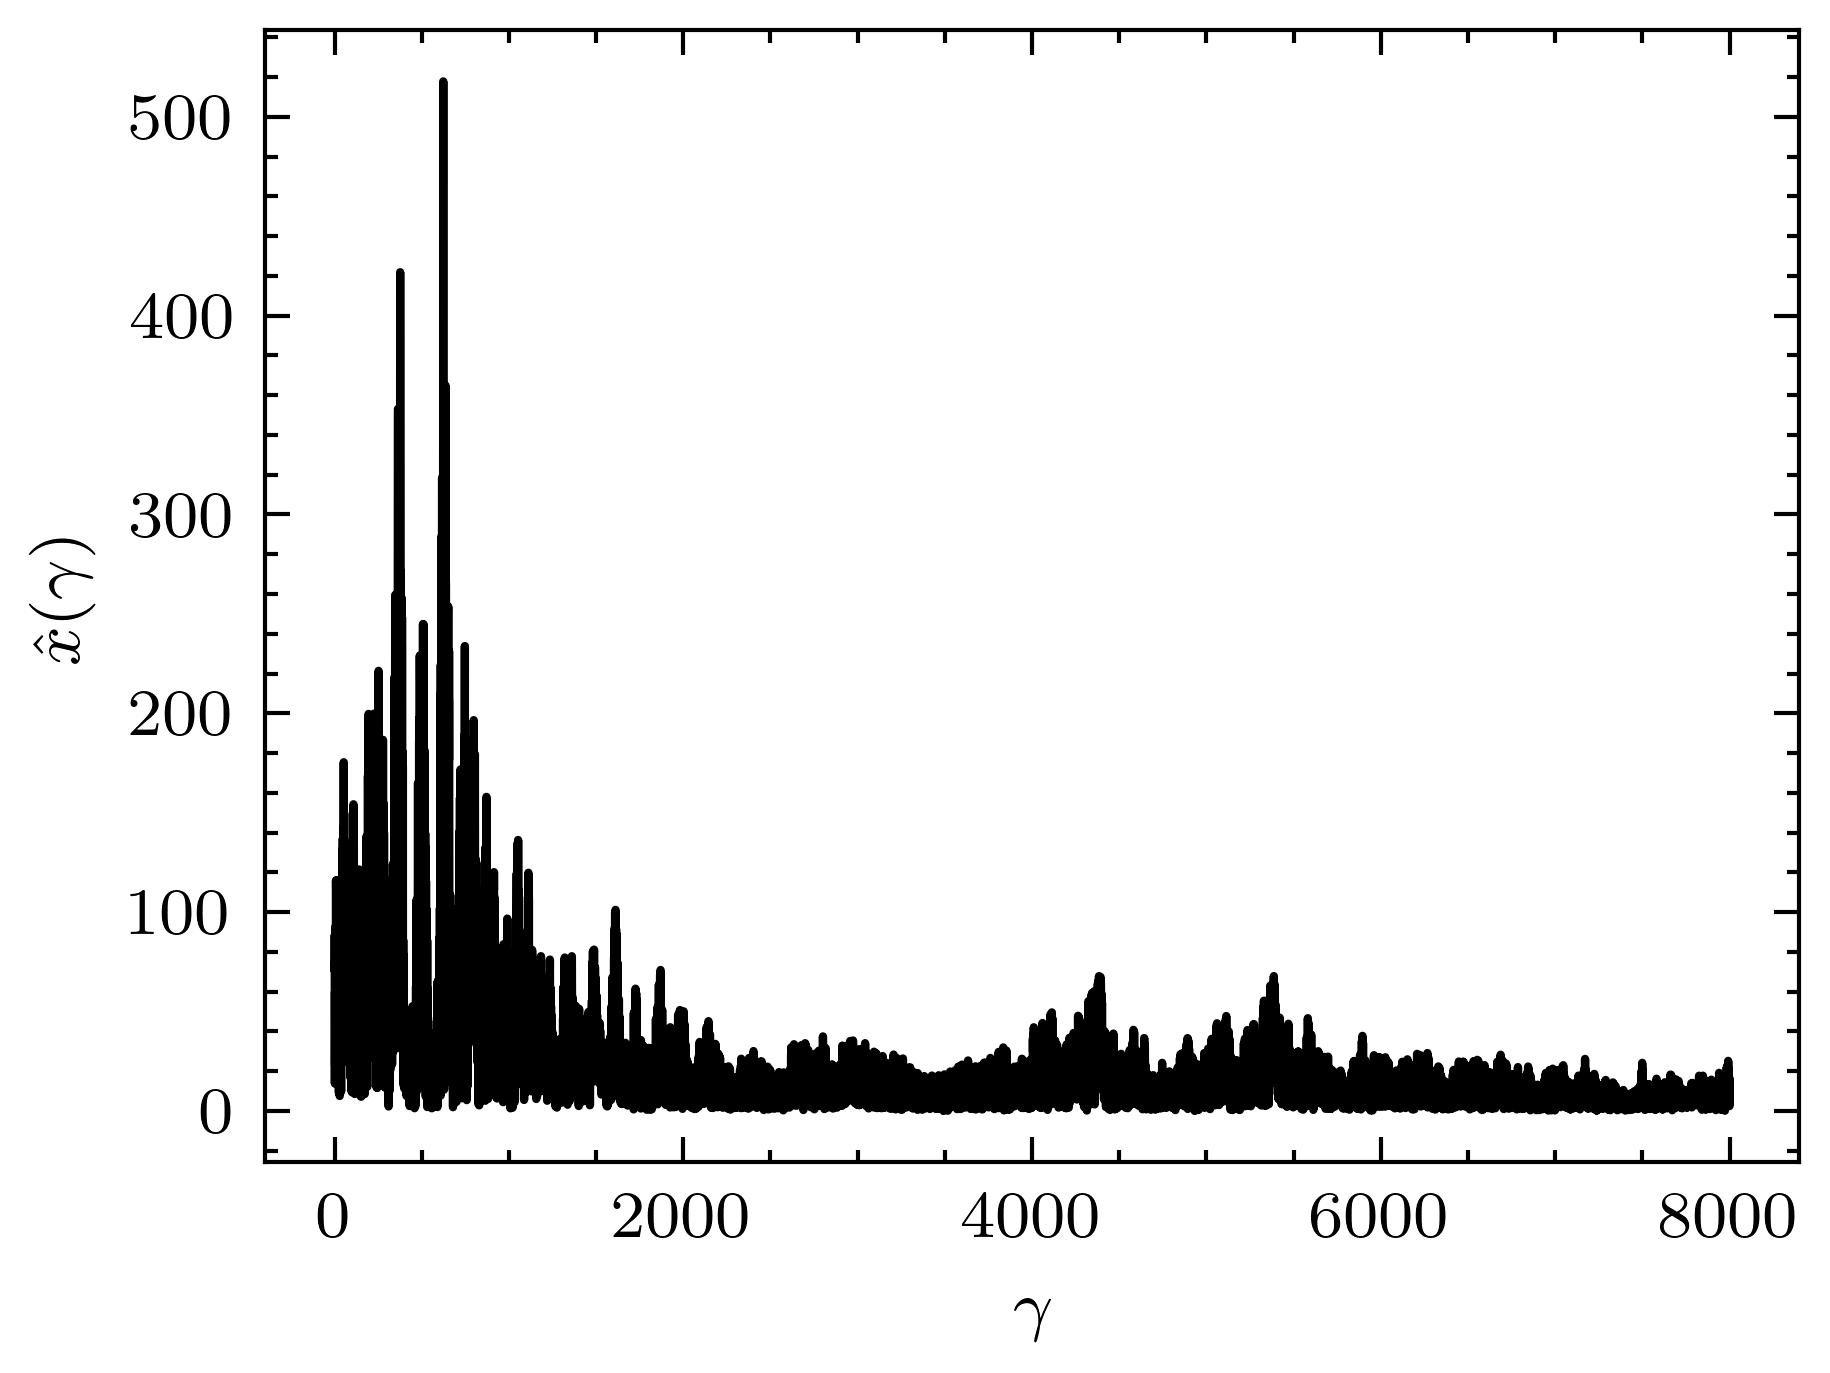

In [40]:
plot_spec(cosine_modulation(s, 500, Fs), Fs, Fs/2);